In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import community
import community.community_louvain as community_louvain
import networkx as nx
import random
import collections
import csv
import seaborn as sns

In [2]:
def data_graph(dataset, delimiter):
    
    data = pd.read_csv(dataset, delimiter=delimiter)
    print(data.shape)
    data.columns = ['From','To']
    tempWeight = [1 for i in range(data.shape[0])]
    data['Weight'] = tempWeight
    print(data.head())
    
    graph = nx.Graph()
    # Adding the edges.
    for index,row in data.iterrows():
        graph.add_edges_from([(row[0],row[1])],weight = row[2])
    
    return data, graph

In [105]:
cancer1_csv, cancer1_graph = data_graph('../data/Bone-Cancer.csv',",")

(1783, 2)
          From      To  Weight
0        4EBP1    AKT1       1
1        4EBP1   CCND1       1
2        4EBP1  MAPK14       1
3        4EBP1   TFDP1       1
4  14-3-3-zeta    AKT1       1


In [22]:
cancer2_csv, cancer2_graph = data_graph('../data/Breast-Normal.csv',",")

(1696, 2)
          From       To  Weight
0  14-3-3-zeta     AKT1       1
1  14-3-3-zeta   CDC25A       1
2  14-3-3-zeta   CDC25B       1
3  14-3-3-zeta  CSNK1A1       1
4  14-3-3-zeta   CTNNB1       1


In [14]:
def transitivity(data, skip):
    pos = data.loc[data['Weight'] > 0]
    neg = data.loc[data['Weight'] < 0]
    graphP = nx.Graph()
    # Adding the edges.
    for index,row in pos.iterrows():
        graphP.add_edges_from([(row[0],row[1])])
    print('+ve Transitivity: ' + str(nx.transitivity(graphP)))
    if not skip:
        graphN = nx.DiGraph()
        # Adding the edges.
        for index,row in neg.iterrows():
            graphN.add_edges_from([(row[0],row[1])])
        print('-ve Transitivity: ' + str(nx.transitivity(graphN)))

In [15]:
transitivity(cancer1_csv, True)

+ve Transitivity: 0.2619917012448133


In [34]:
def stats(data,graph):
    # Number of nodes
    print('Nodes = ' + str(graph.number_of_nodes()))

    # Number of edges
    print('Edges = ' + str(graph.number_of_edges()))

    # Positive and negative edges 

    Stats = pd.DataFrame(graph.degree(),columns=['From','Degree']).sort_values('From')
    b= data.groupby('From',as_index=False)[['Weight']].sum().sort_values('From')
    c= data.groupby('To',as_index=False)[['Weight']].sum().sort_values('To')
    Stats = Stats.merge(b,on='From',how='left')
    Stats = Stats.drop(['Weight'],axis=1)
    Stats.fillna(0,inplace=True)
    print(Stats.head())
    
    print(Stats.describe())
    print(Stats.max(axis=0))
    
    print('Average Clustering = ' + str(nx.average_clustering(graph)))
    print('Transitivity = '+ str(nx.transitivity(graph)))
    print('Density = ' + str(nx.density(graph)))
    print('Diameter = ' + str(nx.diameter(graph)))
    print('Radius = ' + str(nx.radius(graph)))
    
    data['Weight'].plot.hist(bins=2, alpha=1, align='mid')
    plt.xlabel('Weight')
    plt.ylabel('Frequency')
    plt.title('Count of weight of edges')
    plt.xticks([-1,1])
    plt.show()
    
    return Stats

Nodes = 351
Edges = 1783
          From  Degree
0  14-3-3-zeta       7
1        4EBP1       4
2        ABIN2       9
3         ABL1      38
4         AIP4       7
           Degree
count  351.000000
mean    10.159544
std     10.641840
min      1.000000
25%      3.000000
50%      7.000000
75%     12.000000
max     66.000000
From      add1
Degree      66
dtype: object
Average Clustering = 0.22900659944437912
Transitivity = 0.2619917012448133
Density = 0.02902726902726903
Diameter = 7
Radius = 4


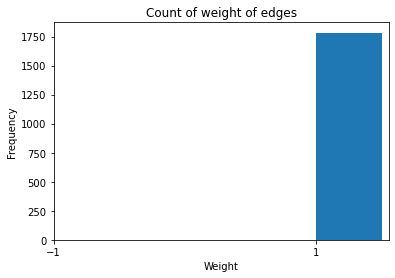

In [70]:
cancer1_Stats = stats(cancer1_csv, cancer1_graph)

In [40]:
cancer1_Stats

,From,Degree
0,14-3-3-zeta,7
1,4EBP1,4
2,ABIN2,9
3,ABL1,38
4,AIP4,7
...,...,...
346,YY1,3
347,ZIN,3
348,ZNF216,2
349,ZNF259,2


Nodes = 331
Edges = 1696
          From  Degree
0  14-3-3-zeta       9
1         ABL1      34
2       ACVRL1       8
3       ADAM17       7
4         ADD1      11
           Degree
count  331.000000
mean    10.247734
std     11.470342
min      1.000000
25%      3.000000
50%      7.000000
75%     12.000000
max     66.000000
From      ZNF259
Degree        66
dtype: object
Average Clustering = 0.22778479485541125
Transitivity = 0.2562935190144617
Density = 0.03105373981506912


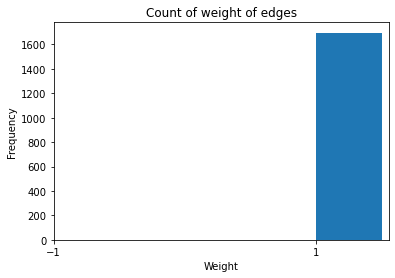

In [23]:
cancer2_Stats = stats(cancer2_csv, cancer2_graph)

In [29]:
cancer1_Stats

,From,Degree
0,14-3-3-zeta,7
1,4EBP1,4
2,ABIN2,9
3,ABL1,38
4,AIP4,7
...,...,...
346,YY1,3
347,ZIN,3
348,ZNF216,2
349,ZNF259,2


In [53]:
def degreeDistribution(data,graph):
    
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    #print(degreeCount)
    deg, cnt = zip(*degreeCount.items())
    #deg, cnt = np.array(deg), deg.array(cnt)
#     print(len(deg))
#     deg = deg[0:100]
#     cnt = cnt[0:100]
#     print(len(deg))
    print()
    plt.figure(figsize=(15, 5), dpi=80)
    plt.plot(deg,cnt,color="#3F5D7D")
    plt.xlabel('Degree /Number of Connections')
    plt.ylabel('Number of nodes')
    plt.title('Actual Plot(Epinion)')
    #plt.grid()
    #plt.xlim([0, max(deg)])
    #plt.show()
    print()
    #plt.figure(figsize=(15, 5), dpi=80)
    plt.bar(deg,(cnt),color = 'r')
    #plt.plot(n1)
    #plt.plot(deg,(np.log(cnt)),color="#3F5D7D")
    #plt.xlabel('In-Degree /Number of Connections')
    #plt.ylabel('Number of nodes')
    #plt.title('Log Plot(Epinion)')
    plt.xlim([0, max(deg)])
    plt.grid()
    plt.show()
    

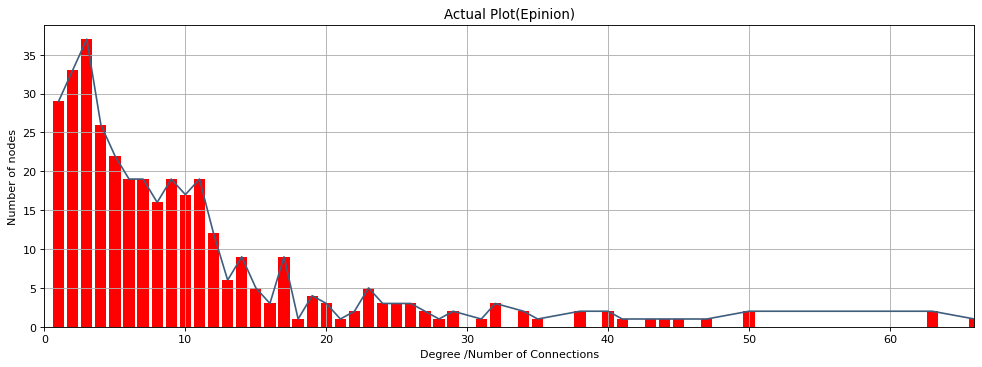

In [54]:
degreeDistribution(cancer1_csv, cancer1_graph)

In [6]:
def degreeCentrality(graph, name):
    # Degree centrality stats
    print("Degree")
    degree_centrality_nodes = nx.degree_centrality(graph)
    degree_centrality_nodes = collections.Counter(degree_centrality_nodes)
    for k, v in degree_centrality_nodes.most_common(10):
        print ((k, v))
    with open(name+'_degreecentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in degree_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count))  
    DegreeCentrality = pd.read_csv(name+'_degreecentrality.csv', delimiter=',')
    
    return DegreeCentrality

In [7]:
def H_value(max_value,in_values):
  sum = np.sum(max_value - np.array(in_values))
  return sum

# Sample modified degree centrality
# According to the proposed approach the node with least
# degree centrality (as H value will be high for the most
# influential node and it is in the denominator) can be
# considered as the node with most number of connections and
# hence the most influential node.

# G = nx.gn_graph(10)
# G = nx.petersen_graph()
# subax2 = plt.subplot(121)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

def enhancedCentrality(graph, name):
  A = nx.adjacency_matrix(graph)
  B = A.astype(np.bool_)
  C = B.toarray()

  degree_centrality_nodes = nx.degree_centrality(graph)
  
  values = list(degree_centrality_nodes.values())
  values = [i*(len(values)-1) for i in values]
  max_value = max(values)
  sum = H_value(max_value,values)
  print(sum)
  clustering_array = nx.clustering(graph)
  clustering_values = list(clustering_array.values())
  clustering_values = [float(i) for i in clustering_values]
  with open(name+'_clusteringCentrality.csv', encoding='utf-8-sig', mode='w') as fp:
    fp.write('col1\n')
    for val in clustering_values:  
      fp.write('{}\n'.format(val))

  enhanced_degree_centrality = []
  if name == 'Epinion':
    for i in range(len(C)):
      #temp = (float(max_value - in_degree_centrality_nodes[i])) * float(clustering_array[i]) /float(sum) 
      temp = (float(max_value - degree_centrality_nodes[i])) 
      enhanced_degree_centrality.append((i,temp))
  else:
    for i,j in degree_centrality_nodes:
      temp = (float(max_value - j)) * float(clustering_array[i]) /float(sum) 
      enhanced_degree_centrality.append((i,temp))
    
  enhanced_degree_centrality = [ (i,'%.12f' % elem) for i,elem in enhanced_degree_centrality ]
  # print(enhanced_degree_centrality)
  file = open(name+'______enhancedDegreeCentrality.csv', 'w+', newline ='\n') 
  with file:     
    write = csv.writer(file) 
    write.writerows(enhanced_degree_centrality) 
    
  enhancedInDegreeCentrality = pd.read_csv(name+'_enhancedDegreeCentrality.csv', delimiter=',')
  clusteringCentrality = pd.read_csv(name+'_clusteringCentrality.csv', delimiter=',')
    
  return enhancedDegreeCentrality, clusteringCentrality




# def H_value(max_value,in_values):
#   sum = np.sum(max_value - np.array(in_values))
#   return sum

# # Sample modified degree centrality
# # According to the proposed approach the node with least
# # degree centrality (as H value will be high for the most
# # influential node and it is in the denominator) can be
# # considered as the node with most number of connections and
# # hence the most influential node.

# # G = nx.gn_graph(10)
# # G = nx.petersen_graph()
# # subax2 = plt.subplot(121)
# # nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

# def enhancedCentrality(graph, name):
#   A = nx.adjacency_matrix(graph)
#   B = A.astype(np.bool_)
#   C = B.toarray()
#   in_degree_centrality_nodes = nx.in_degree_centrality(graph)
#   in_values = list(in_degree_centrality_nodes.values())
#   in_values = [i*(len(in_values)-1) for i in in_values]
#   max_value = max(in_values)
#   sum = H_value(max_value,in_values)
#   clustering_array = nx.clustering(graph)
#   clustering_values = list(clustering_array.values())
#   clustering_values = [float(i) for i in clustering_values]
#   with open(name+'_clusteringCentrality.csv', encoding='utf-8-sig', mode='w') as fp:
#     fp.write('col1\n')  
#     for val in clustering_values:  
#       fp.write('{}\n'.format(val)) 

#   enhanced_degree_centrality = []
#   for i in range(len(C)):
#     temp = (float(max_value - in_values[i])) * float(clustering_values[i]) /float(sum) 
#     enhanced_degree_centrality.append(temp)
    
#   enhanced_degree_centrality = [float(i) for i in enhanced_degree_centrality]
#   with open(name+'_enhancedInDegreeCentrality.csv', encoding='utf-8-sig', mode='w') as fp:
#     fp.write('col1\n')  
#     for val in enhanced_degree_centrality:  
#       fp.write('{}\n'.format(val)) 
    
#   enhancedInDegreeCentrality = pd.read_csv(name+'_enhancedInDegreeCentrality.csv', delimiter=',')
#   clusteringCentrality = pd.read_csv(name+'_clusteringCentrality.csv', delimiter=',')
    
#   return enhancedInDegreeCentrality, clusteringCentrality

In [8]:
def eigenVectorCentrality(graph, name):
    # Eigen Vector centrality stats
    print("Eigen Vector centrality")
    eigenvector_centrality_nodes = nx.eigenvector_centrality_numpy(graph)
    eigenvector_centrality_nodes = collections.Counter(eigenvector_centrality_nodes)
    for k, v in eigenvector_centrality_nodes.most_common(10):
        print ((k, v))
    with open(name+'_eigenvectorcentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in eigenvector_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 
            
    eigenvectorCentrality = pd.read_csv(name+'_eigenvectorcentrality.csv', delimiter=',')

    return eigenvectorCentrality


In [9]:
def khatzCentrality(graph,name):
    # Katz centrality stats
    # Not running on colab
    print("Katz centrality")
    katz_centrality_numpy_nodes = nx.katz_centrality_numpy(graph)
    katz_centrality_numpy_nodes = collections.Counter(katz_centrality_numpy_nodes)
#    for k, v in katz_centrality_numpy_nodes.most_common(10):
#      print ((k, v))
    with open(name+'_khatzcentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in katz_centrality_numpy_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 
            
    khatzCentrality = pd.read_csv(name+'_khatzcentrality.csv', delimiter=',')

    return khatzCentrality

In [10]:
def closenessCentrality(graph, name):
    # Closeness centrality stats
    # Not running on colab
    print("closeness centrality ")
    closeness_centrality_nodes = nx.closeness_centrality(graph)
    closeness_centrality_nodes = collections.Counter(closeness_centrality_nodes)
#    for k, v in closeness_centrality_nodes.most_common(10):
#        print ((k, v))
    with open(name+'_closenesscentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in closeness_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 
            
    closenessCentrality = pd.read_csv(name+'_closenesscentrality.csv', delimiter=',')

    return closenessCentrality

In [11]:
def betweenessCentrality(graph,name):
    # Betweenness centrality stats
    # Not running on colab
    print("Betweenness centrality ")
    betweenness_centrality_nodes = nx.betweenness_centrality(graph)
    betweenness_centrality_nodes = collections.Counter(betweenness_centrality_nodes)
#    for k, v in betweenness_centrality_nodes.most_common(10):
#        print ((k, v))
    with open(name+'_betweennessscentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in betweenness_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 
            
    betweennessCentrality = pd.read_csv(name+'_betweennessscentrality.csv', delimiter=',')

    return betweennessCentrality

In [57]:
def degreeRelationship(Stats, graph, name):
    # Out degree and indegree relationship, relationship between positive and negative weighted outgoing 
    # edges in the network and relationship between positive and negative ingoing edges.
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     plt.plot(Stats['Pos_out'],Stats['Neg_out'],'o',markersize=0.4, color = 'brown')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Positive Outdegree')
#     plt.ylabel('Negativetive Outdegree')
#     plt.title(name+' Outdegree(Pos-Neg) relationship')
#     plt.legend(['Node'])
#     plt.grid()
#     plt.show()
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     plt.plot(Stats['Pos_in'],Stats['Neg_in'],'o',markersize=0.4, color = 'brown')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Positive Indegree')
#     plt.ylabel('Negativetive Indegree')
#     plt.title(name+' Indegree(Pos-Neg) relationship')
#     plt.legend(['Node'])
#     plt.grid()
#     plt.show()
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     plt.plot(Stats['Outdegree'],Stats['Indegree'],'o',markersize=0.4, color = 'brown')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Outdegree')
#     plt.ylabel('Indegree')
#     plt.title(name+' Outdegree-Indegree relationship')
#     plt.legend(['Node'])
#     plt.grid()
#     plt.show()
    
    
    plt.figure(figsize=(5, 5), dpi=80)
    Deg_cor = nx.average_neighbor_degree(graph)
    dict_list = []
    for key, value in Deg_cor.items():
        temp = [key,value]
        temp[0] = graph.degree(key)
        dict_list.append(temp)
    dfa11 = pd.DataFrame(dict_list,columns =['Degree','Average neighbors Degree'])
    dfa21 = dfa11.groupby('Degree',as_index=False)['Average neighbors Degree'].mean()
    plt.plot(dfa11['Degree'],dfa11['Average neighbors degree'],'o',markersize=0.3, color = 'brown')
    plt.plot(dfa21['Degree'],dfa21['Average neighbors ddegree'],'o',markersize=1, color = 'yellow')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Average neighbors degree')
    plt.title(name+' Degree-Neighbour degree relationship')
    plt.legend(['Node','Mean at same degree'])
    plt.grid()
    plt.show()
    
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     Deg_cor = nx.average_neighbor_degree(graph,target='in')
#     dict_list = []
#     for key, value in Deg_cor.items():
#         temp = [key,value]
#         temp[0] = graph.degree(key,'in')
#         dict_list.append(temp)
#     dfa12 = pd.DataFrame(dict_list,columns =['Indegree','Average neighbors indegree'])
#     # group same indegree values and take their mean
#     dfa22 = dfa12.groupby('Indegree',as_index=False)['Average neighbors indegree'].mean()
#     plt.plot(dfa12['Indegree'],dfa12['Average neighbors indegree'],'o',markersize=0.3, color = 'brown')
#     plt.plot(dfa22['Indegree'],dfa22['Average neighbors indegree'],'o',markersize=1, color = 'yellow')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Indegree')
#     plt.ylabel('Average neighbors indegree')
#     plt.title(name+' Indegree-Neighbour indegree relationship')
#     plt.legend(['Node','Mean at same indegree'])
#     plt.grid()
#     plt.show()
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     plt.plot(dfa12['Indegree'],dfa11['Average neighbors outdegree'],'o',markersize=0.3, color = 'brown')
#     plt.plot(dfa22['Indegree'],dfa21['Average neighbors outdegree'],'o',markersize=1, color = 'yellow')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Indegree')
#     plt.ylabel('Average neighbors outdegree')
#     plt.title(name+' Indegree-Neighbour outdegree relationship')
#     plt.legend(['Node','Mean at same indegree'])
#     plt.grid()
#     plt.show()
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     plt.plot(dfa11['Outdegree'],dfa12['Average neighbors indegree'],'o',markersize=0.3, color = 'brown')
#     plt.plot(dfa21['Outdegree'],dfa22['Average neighbors indegree'],'o',markersize=1, color = 'yellow')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Outdegree')
#     plt.ylabel('Average neighbors indegree')
#     plt.title(name+' Outdegree-Neighbour indegree relationship')
#     plt.legend(['Node','Mean at same outdegree'])
#     plt.grid()
#     plt.show()
    
    
    
#     print('In-In assortativity coefficient = '+ str(nx.degree_assortativity_coefficient(graph,'in','in')))
#     print('Out-Out assortativity coefficient = '+ str(nx.degree_assortativity_coefficient(graph,'out','out')))
#     print('In-Out assortativity coefficient = '+ str(nx.degree_assortativity_coefficient(graph,'in','out')))
#     print('Out-In assortativity coefficient = '+ str(nx.degree_assortativity_coefficient(graph,'out','in')))
    print('Graph assortativity coefficient = '+ str(nx.degree_assortativity_coefficient(graph)))
    

In [29]:
def connectedComp(graph):
    largest_cc = max(nx.connected_components(graph), key=len)
    weak_graph = graph.subgraph(largest_cc)
    return weak_graph

In [60]:
def powerLaw(Stats, graph):
    import math
    pos = Stats['Degree'][Stats['Degree'] != 0]
    pos = pos.transform(lambda x: math.floor(math.log(x)) )

    prob = pos.value_counts(normalize=True)
    threshold = 0.0001
    mask = prob > threshold
    tail_prob = prob.loc[~mask].sum()
    prob = prob.loc[mask]
    prob['other'] = tail_prob
    prob.plot(kind='bar',log=True,color='r')
    plt.title('Degree')
    plt.grid()
    
    import igraph
    pos = Stats['Degree'][Stats['Degree'] != 0]
    print(igraph.power_law_fit(pos))

In [ ]:
def communities(graph):
    SCC = max(nx.strongly_connected_components(graph), key=len)
    print('Size of maximal strongly connected component is ' + str(len(SCC)))
    WCC = max(nx.weakly_connected_components(graph), key=len)
    print('Size of maximal weakly connected component is ' + str(len(WCC)))
    DIF = list(set(WCC)-set(SCC))
    OUT_C = []
    IN_C = []
    IN = 0
    OUT = 0
    for index, node1 in enumerate(DIF):
        for index2, node2 in enumerate(SCC):

            if graph.has_edge(node1,node2):
                OUT+=1
                OUT_C.append(node2)
                break
            elif graph.has_edge(node2,node1):
                IN+=1
                IN_C.append(node1)
                break


    TND = len(DIF)-IN-OUT
    print(IN,OUT,TND)
    
    SCC = max(nx.strongly_connected_components(graph), key=len)
    scc_com = graph.subgraph(SCC).copy()
    scc2 = nx.Graph(scc_com)

    # Removing the weights.

    for u,v,d in scc2.edges(data=True):
        d['weight']=1

    communities =community_louvain.best_partition(scc2,random_state=5)
    
    print(set(communities.values()))
    # node numver, community it belongs to
    # find size of all communities
    # group by val -> key.sum()
    
    ind_graph = community_louvain.induced_graph(communities, scc2)

    inv_map = dict()
    for key, value in communities.items():
        inv_map.setdefault(value, list()).append(key)

    # Removing the small communities

    inv_map2 = {key:val for key, val in inv_map.items() if len(val) >= 100}
    sizes = np.array([len(inv_map2[k]) for k in list(inv_map2.keys())])

    # Removing edges from the graph:

    inv_keys = [key for key in inv_map2]
    ind_nodes = list(ind_graph.nodes())
    for node in ind_nodes:
        if node not in inv_keys:
            ind_graph.remove_node(node)
            
    print(community_louvain.modularity(communities,scc2))
    print(sizes)

In [27]:
def richClubEffect(Stats, graph):
    
    # We want to see the rich club effect in the 100 edges with the highest indegree.
    picked = 100
    rce1 = Stats[['From','Indegree']].sort_values(by=['Indegree'], ascending=False)[0:picked]
    rich = list(rce1.From.values)
    rece_graph = graph.subgraph(rich).copy()
    # Dropping first value

    densities = np.zeros((3,picked))
    pos_edges = 0
    neg_edges = 0 
    for rank, node1 in enumerate(rich[1::]):

        for rank2, node2 in enumerate(rich[:rank+1]): 
            if graph.has_edge(node1, node2):
                if graph[node1][node2]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1
            if graph.has_edge(node2, node1):
                if graph[node2][node1]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1

        densities[0][rank] = pos_edges/(rank+2)/(rank+1)
        densities[1][rank] = neg_edges/(rank+2)/(rank+1)
        densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)

    plt.figure(figsize=(15, 5), dpi=80)
    plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density(+ve effect)')
    plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density(+ve effect)')
    #plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
    #plt.legend(loc="upper right")
    #plt.ylim((0,1))
    #plt.xlim((-2,picked-2))
    #plt.show()

    # Checking the one sidedness
    print(nx.reciprocity(rece_graph))
    
    
    
    # We want to see the rich club effect in the 100 edges with the highest negative_degree.
    picked = 100
    rce2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[4:picked+4]
    rich = list(rce2.From.values)
    rece_graph2 = graph.subgraph(rich).copy()
    # Dropping first value

    densities = np.zeros((3,picked))
    pos_edges = 0
    neg_edges = 0 

    for rank, node1 in enumerate(rich[1::]):

        for rank2, node2 in enumerate(rich[:rank+1]): 
            if graph.has_edge(node1, node2):
                if graph[node1][node2]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1
            if graph.has_edge(node2, node1):
                if graph[node2][node1]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1


        densities[0][rank] = pos_edges/(rank+2)/(rank+1)
        densities[1][rank] = neg_edges/(rank+2)/(rank+1)
        densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)


    plt.plot( [i for i in range(0,picked)],densities[0,],'g-',label='Positive edge density(-ve effect)')
    plt.plot( [i for i in range(0,picked)],densities[1,],'m-',label='Negative edge density(-ve effect)')
    #plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
    plt.legend(loc="upper right")
    plt.ylim((0,1))
    plt.xlim((-2,picked-2))
    plt.title('Rich Club Effect', fontsize = 20)
    plt.grid()
    plt.ylim([0,0.6])
    plt.xlabel('Node Number')
    plt.ylabel('Density')
    plt.show()
    
    # Checking the one sidedness
    print(nx.reciprocity(rece_graph2))
    
    
    
#     # We want to see the rich club effect in the 100 edges with the highest outdegree.
#     picked = 100
#     rce3 = Stats[['From','Outdegree']].sort_values(by=['Outdegree'], ascending=False)[0:picked]
#     rich = list(rce3.From.values)
#     rece_graph3 = graph.subgraph(rich).copy()
#     # Dropping first value

#     densities = np.zeros((3,picked))
#     pos_edges = 0
#     neg_edges = 0 
#     for rank, node1 in enumerate(rich[1::]):

#         for rank2, node2 in enumerate(rich[:rank+1]): 
#             if graph.has_edge(node1, node2):
#                 if graph[node1][node2]['weight'] == 1:
#                     pos_edges += 1
#                 else:
#                     neg_edges += 1
#             if graph.has_edge(node2, node1):
#                 if graph[node2][node1]['weight'] == 1:
#                     pos_edges += 1
#                 else:
#                     neg_edges += 1

#         densities[0][rank] = pos_edges/(rank+2)/(rank+1)
#         densities[1][rank] = neg_edges/(rank+2)/(rank+1)
#         densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)


#     plt.plot( [i for i in range(0,picked)],densities[0,],'g-',label='Positive edge outdegree density')
#     plt.plot( [i for i in range(0,picked)],densities[1,],'m-',label='Negative edge outdegree density')
#     #plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
#     plt.legend(loc="upper right")
#     plt.ylim((0,1))
#     plt.xlim((-2,picked-2))
#     plt.title('Rich Club Effect')
#     plt.grid()
#     plt.ylim([0,0.6])
#     plt.show()

    # Checking the one sidedness
    #print(nx.reciprocity(rece_graph3))
    
    
#     # We want to see the rich club effect in the 100 edges with the highest negitive outdegree.
#     picked = 100
#     rce4 = Stats[['From','Neg_out']].sort_values(by=['Neg_out'], ascending=False)[0:picked]
#     rich = list(rce4.From.values)
#     rece_graph4 = graph.subgraph(rich).copy()
#     # Dropping first value

#     densities = np.zeros((3,picked))
#     pos_edges = 0
#     neg_edges = 0 
#     for rank, node1 in enumerate(rich[1::]):

#         for rank2, node2 in enumerate(rich[:rank+1]): 
#             if graph.has_edge(node1, node2):
#                 if graph[node1][node2]['weight'] == 1:
#                     pos_edges += 1
#                 else:
#                     neg_edges += 1
#             if graph.has_edge(node2, node1):
#                 if graph[node2][node1]['weight'] == 1:
#                     pos_edges += 1
#                 else:
#                     neg_edges += 1

#         densities[0][rank] = pos_edges/(rank+2)/(rank+1)
#         densities[1][rank] = neg_edges/(rank+2)/(rank+1)
#         densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)


#     plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
#     plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
#     plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
#     plt.legend(loc="upper right")
#     plt.ylim((0,1))
#     plt.xlim((-2,picked-2))
#     plt.show()

#     # Checking the one sidedness
#     print(nx.reciprocity(rece_graph4))

0.6515615431720759


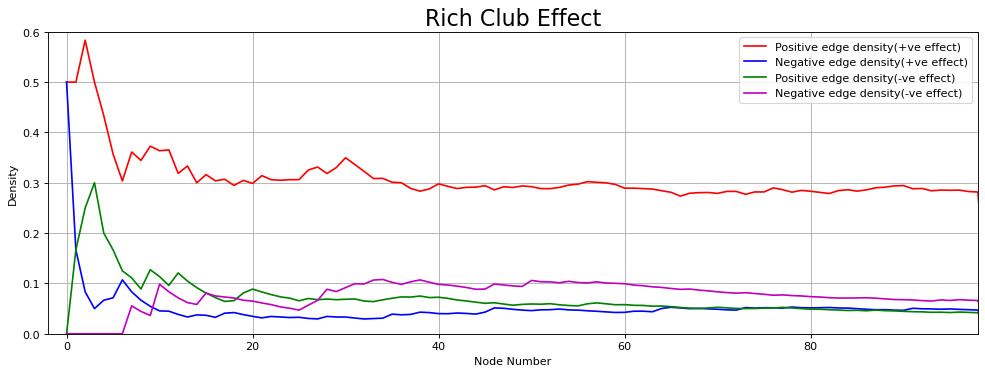

0.38847583643122674


In [28]:
richClubEffect(epi_Stats, epi_graph)

In [ ]:
def communitiesNewCode(graph):
    # compute the best partition
    partition = community_louvain.best_partition(graph)
    print(partition)
#     # draw the graph
#     pos = nx.spring_layout(graph)
#     # color the nodes according to their partition
#     cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
#     nx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=40,
#                            cmap=cmap, node_color=list(partition.values()))
#     nx.draw_networkx_edges(graph, pos, alpha=0.5)
#     plt.show()

In [49]:
c1c1, c1c2  = degreeCentrality(cancer1_graph, 'BoneCancer')

Degree
('STAT1', 0.18857142857142858)
('FYN', 0.18)
('SMAD3', 0.18)
('STAT5B', 0.14285714285714285)
('ERK1', 0.14285714285714285)
('LYN', 0.13428571428571429)
('HDAC1', 0.12857142857142856)
('STAT3', 0.12571428571428572)
('CSK', 0.12285714285714286)
('SRC', 0.11714285714285715)


In [50]:
c1c3 = eigenVectorCentrality(cancer1_graph, 'BoneCancer')

Eigen Vector centrality
('STAT1', 0.2414024440213811)
('FYN', 0.23628867555131602)
('STAT5B', 0.2060086019294528)
('SRC', 0.19698116652173236)
('LYN', 0.1963108549179626)
('STAT3', 0.19618489378969584)
('CSK', 0.19523709868547479)
('GRB2', 0.18999137340030714)
('CBL', 0.18613011802077217)
('CRKL', 0.18058002800159756)


In [51]:
c1c6 = closenessCentrality(cancer1_graph, 'BoneCancer')

closeness centrality 


In [52]:
c1c7 = betweenessCentrality(cancer1_graph, 'BoneCancer')

Betweenness centrality 


In [56]:
c1c4, c1c5 = enhancedCentrality(cancer1_graph, 'BoneCancer')

19600.0


ValueError: too many values to unpack (expected 2)

In [54]:
c1c6 = khatzCentrality(cancer1_graph, 'BoneCancer')

Katz centrality


In [12]:
c2c1, c2c2  = degreeCentrality(cancer2_graph, 'BreastCancer')
c2c3 = eigenVectorCentrality(cancer2_graph, 'BreastCancer')
c2c6 = closenessCentrality(cancer2_graph, 'BreastCancer')
c2c7 = betweenessCentrality(cancer2_graph, 'BreastCancer')
c2c6 = khatzCentrality(cancer2_graph, 'BreastCancer')

Degree
('SMAD2', 0.1814814814814815)
('FYN', 0.17407407407407408)
('SMAD3', 0.17222222222222222)
('STAT5A', 0.17037037037037037)
('STAT1', 0.17037037037037037)
('ERK1', 0.14444444444444446)
('LYN', 0.12222222222222223)
('RAF1', 0.12037037037037038)
('GRB2', 0.12037037037037038)
('EGFR', 0.12037037037037038)
Eigen Vector centrality
('FYN', 0.19506198242424283)
('STAT1', 0.19466065881579486)
('STAT5A', 0.194092825450615)
('LYN', 0.16565694932948)
('CSK', 0.16561232899678574)
('CBL', 0.16219626943861795)
('KIT', 0.16189297473279252)
('GRB2', 0.1613574589375679)
('STAT3', 0.16060517574965685)
('TEC', 0.1567665848344549)
closeness centrality 
Betweenness centrality 
Katz centrality


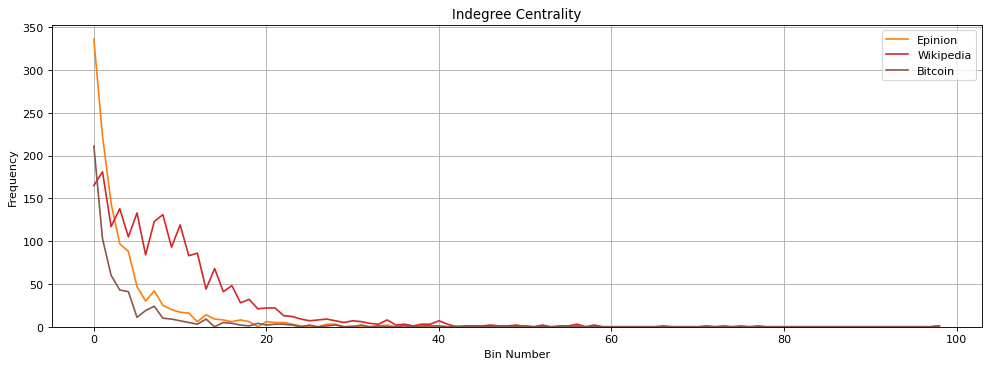

In [190]:
plt.figure(figsize=(15, 5), dpi=80)
val1 = epic1['col2']
n1,x1,_1 = plt.hist(val1,bins=np.linspace(0.001, max(val1), 100), visible=False)
plt.plot(n1)
val2 = wikic1['col2']
n2,x2,_2 = plt.hist(val2,bins=np.linspace(0.001, max(val2), 100), visible=False)
plt.plot(n2)
val3 = bitc1['col2']
n3,x3,_3 = plt.hist(val3,bins=np.linspace(0.002, max(val3), 100), visible=False)
plt.plot(n3)

plt.xlabel('Bin Number')
plt.ylabel('Frequency')
plt.title('Indegree Centrality')
plt.legend(['Epinion', 'Wikipedia', 'Bitcoin'])
plt.grid()
plt.show()

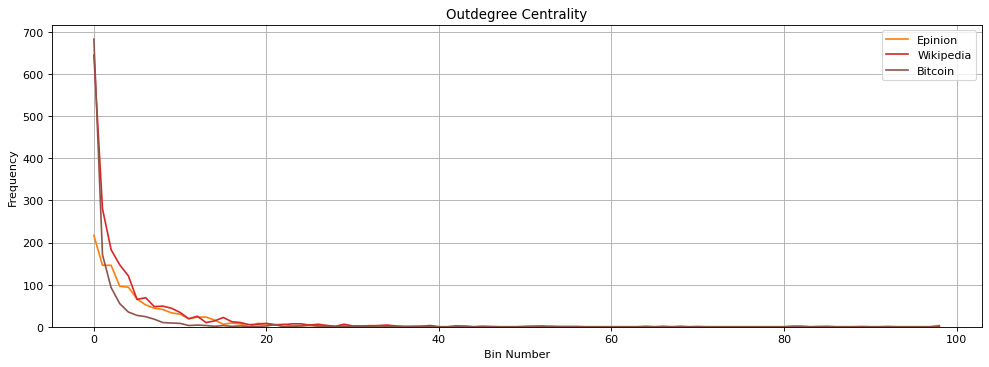

In [189]:
plt.figure(figsize=(15, 5), dpi=80)
val1 = epic2['col2']
n1,x1,_1 = plt.hist(val1,bins=np.linspace(0.001, max(val1), 100), visible=False)
plt.plot(n1)
val2 = wikic2['col2']
n2,x2,_2 = plt.hist(val2,bins=np.linspace(0.001, max(val2), 100), visible=False)
plt.plot(n2)
val3 = bitc2['col2']
n3,x3,_3 = plt.hist(val3,bins=np.linspace(0.001, max(val3), 100), visible=False)
plt.plot(n3)

plt.xlabel('Bin Number')
plt.ylabel('Frequency')
plt.title('Outdegree Centrality')
plt.legend(['Epinion', 'Wikipedia', 'Bitcoin'])
plt.grid()
plt.show()

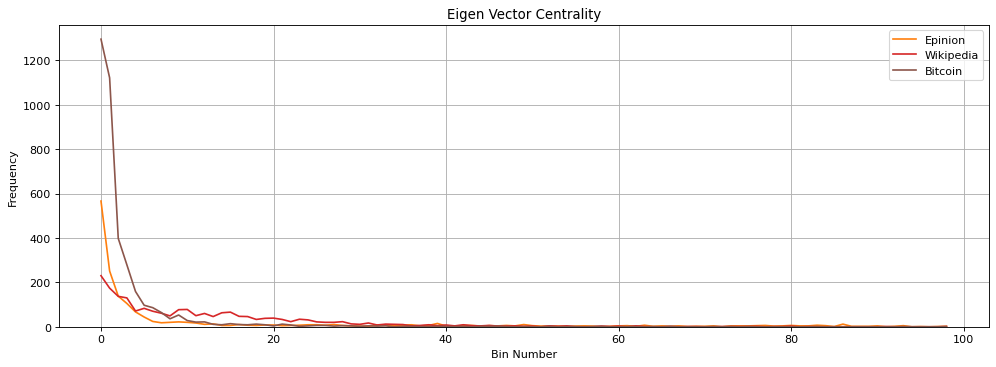

In [188]:
plt.figure(figsize=(15, 5), dpi=80)
val1 = epic3['col2']
n1,x1,_1 = plt.hist(val1,bins=np.linspace(0.001, max(val1), 100), visible=False)
plt.plot(n1)
val2 = wikic3['col2']
n2,x2,_2 = plt.hist(val2,bins=np.linspace(0.001, max(val2), 100), visible=False)
plt.plot(n2)
val3 = bitc3['col2']
n3,x3,_3 = plt.hist(val3,bins=np.linspace(0.001, max(val3), 100), visible=False)
plt.plot(n3)

plt.xlabel('Bin Number')
plt.ylabel('Frequency')
plt.title('Eigen Vector Centrality')
plt.legend(['Epinion', 'Wikipedia', 'Bitcoin'])
plt.grid()
plt.show()

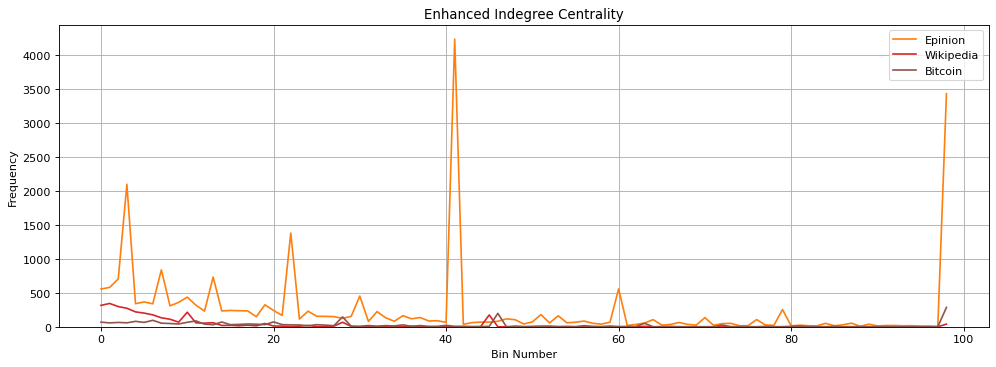

In [187]:
plt.figure(figsize=(15, 5), dpi=80)
val1 = epic4['col1']
n1,x1,_1 = plt.hist(val1,bins=np.linspace(0.000001, max(val1), 100), visible=False)
plt.plot(n1)
val2 = wikic4['col1']
n2,x2,_2 = plt.hist(val2,bins=np.linspace(0.00001, max(val2), 100), visible=False)
plt.plot(n2)
val3 = bitc4['col1']
n3,x3,_3 = plt.hist(val3,bins=np.linspace(0.00001, max(val3), 100), visible=False)
plt.plot(n3)

plt.xlabel('Bin Number')
plt.ylabel('Frequency')
plt.title('Enhanced Indegree Centrality')
plt.legend(['Epinion', 'Wikipedia', 'Bitcoin'])
plt.grid()
plt.show()

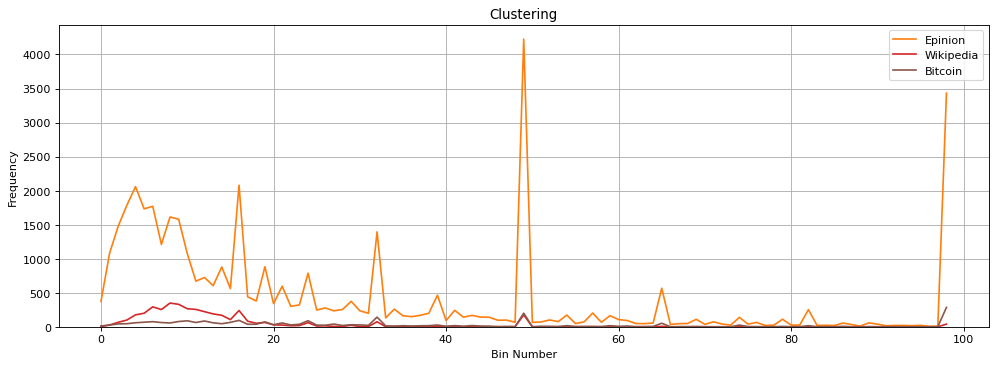

In [186]:
plt.figure(figsize=(15, 5), dpi=80)
val1 = epic5['col1']
n1,x1,_1 = plt.hist(val1,bins=np.linspace(0.001, max(val1), 100), visible=False)
plt.plot(n1)
val2 = wikic5['col1']
n2,x2,_2 = plt.hist(val2,bins=np.linspace(0.001, max(val2), 100), visible=False)
plt.plot(n2)
val3 = bitc5['col1']
n3,x3,_3 = plt.hist(val3,bins=np.linspace(0.001, max(val3), 100), visible=False)
plt.plot(n3)

plt.xlabel('Bin Number')
plt.ylabel('Frequency')
plt.title('Clustering')
plt.legend(['Epinion', 'Wikipedia', 'Bitcoin'])
plt.grid()
plt.show()

In [30]:
c2_connected_graph = connectedComp(cancer2_graph)

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.597631
Cutoff (xmin)     = 9.000000

Log-likelihood    = -495.199266

H0: data was drawn from the fitted distribution

KS test statistic = 0.055091
p-value           = 0.752790

H0 could not be rejected at significance level 0.05


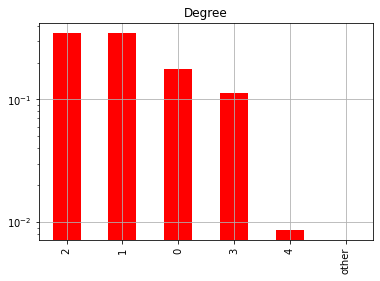

In [63]:
powerLaw(cancer1_Stats, cancer1_graph)

In [ ]:
communities(graph)

Size of maximal strongly connected component is 41441
Size of maximal weakly connected component is 119130
29732 37682 10275
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,

In [ ]:
closenessCentrality(graph)

closeness centrality 


https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.richclub.rich_club_coefficient.html#networkx.algorithms.richclub.rich_club_coefficient

In [65]:
degreeRelationship(cancer1_Stats,cancer1_graph,'BoneCancer')

KeyError: 'Average neighbors degree'

<Figure size 400x400 with 0 Axes>

In [66]:
print(nx.average_shortest_path_length(cancer1_graph))

3.082002442002442


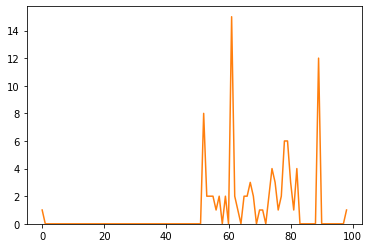

In [21]:
ud_epi = cancer2_graph
ud_epi = ud_epi.remove_edges_from(nx.selfloop_edges(ud_epi))
rc = nx.rich_club_coefficient(cancer2_graph, normalized=True, seed=10)
n1,x1,_1 = plt.hist(rc.values(),bins=np.linspace(0, max(rc.values()), 100), visible = False)
plt.plot(n1)
plt.show()

In [69]:
allD = pd.read_csv('BoneCancer_ALLDATA.csv', delimiter=',')
allD

,betweenness,closeness,degree,eigenvector,khatz
0,SMAD3,STAT1,STAT1,STAT1,CDK2
1,FYN,SMAD3,FYN,FYN,CCNB1
2,HDAC1,ERK1,SMAD3,STAT5B,CCNB2
3,CTNNB1,FYN,STAT5B,SRC,FZR1
4,STAT5B,STAT5B,ERK1,LYN,CCNA2
...,...,...,...,...,...
95,NUP153,MYC,TAB2,DAXX,FOXO1A
96,AIP4,RALBP1,NCOR1,CD44,TFDP2
97,ERK2,CDK7,PPP2CA,CLTC,TIP1
98,SPRY2,PKN1,FHL2,CDK4,SNX4


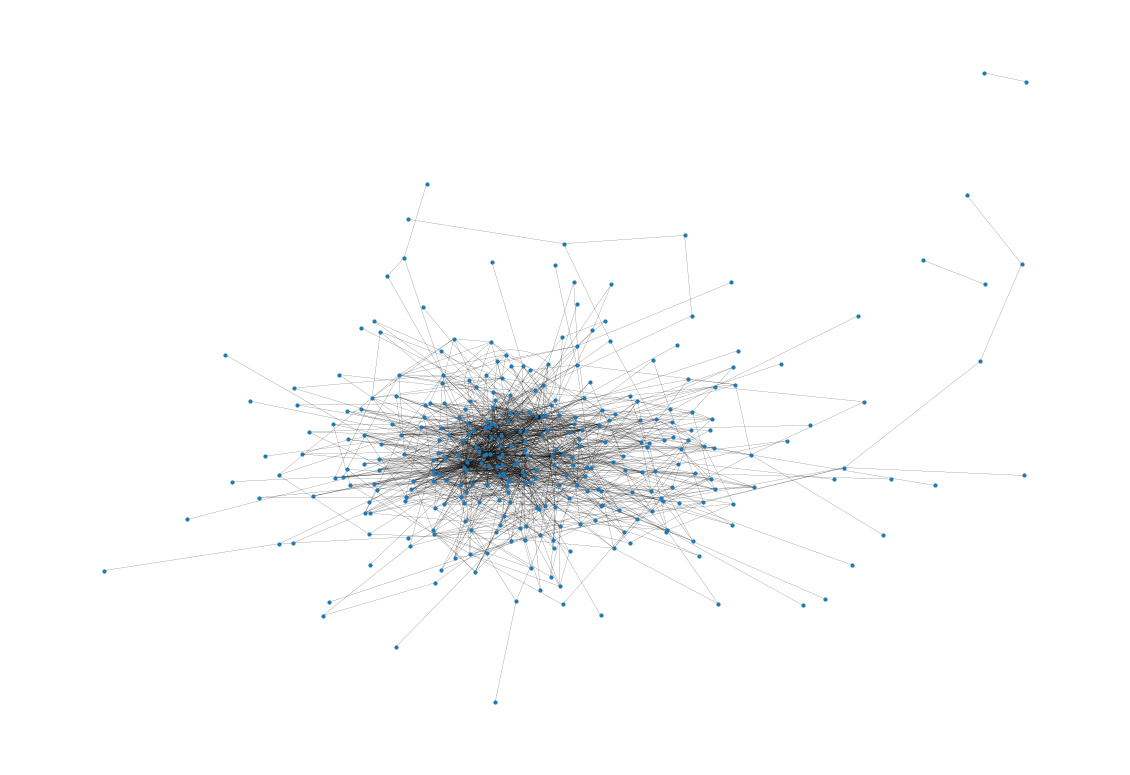

In [107]:
pos = nx.spring_layout(cancer2_graph, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(cancer2_graph, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15)

In [32]:
len(c2_connected_graph.nodes())

327

In [33]:
c2_connected_graph = connectedComp(cancer1_graph)
len(c2_connected_graph.nodes())

351

In [118]:
BoneDictionary = pd.DataFrame(cancer1_Stats['From'])
BoneDictionary['Index'] = range(1, len(BoneDictionary) + 1)
BoneDictionary.to_csv('BoneDictionary.csv', index=False)
cancer1_dictCSV = pd.DataFrame(cancer1_csv)
cancer1_dictCSV = cancer1_dictCSV.drop('Weight', 1)
cancer1_dictCSV = cancer1_dictCSV.replace(dict(zip(BoneDictionary['From'], BoneDictionary['Index'])))
cancer1_dictCSV.to_csv('Bone-Cancer-Dictionary.txt', index=False, sep= '\t')

In [119]:
cancer1_csv, cancer1_graph = data_graph('Bone-Cancer-Dictionary.txt','\t')

(1783, 2)
   From   To  Weight
0     2    7       1
1     2   47       1
2     2  175       1
3     2  319       1
4     1    7       1


Nodes = 351
Edges = 1783
   From  Degree
0     1       7
1     2       4
2     3       9
3     4      38
4     5       7
             From      Degree
count  351.000000  351.000000
mean   176.000000   10.159544
std    101.469207   10.641840
min      1.000000    1.000000
25%     88.500000    3.000000
50%    176.000000    7.000000
75%    263.500000   12.000000
max    351.000000   66.000000
From      351
Degree     66
dtype: int64
Average Clustering = 0.22900659944437912
Transitivity = 0.2619917012448133
Density = 0.02902726902726903
Diameter = 7
Radius = 4


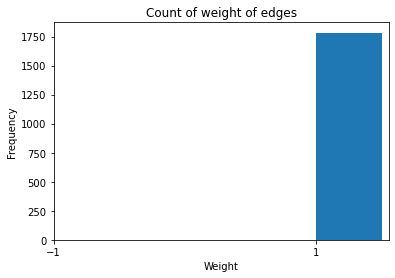

In [120]:
cancer1_Stats = stats(cancer1_csv, cancer1_graph)